In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val
from PIL import Image

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 128
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 2048
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"Total training examples: {len(x_train)}")
print(f"Total test examples: {len(x_test)}")

def flip_random_crop(image):
  
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, (CROP_TO, CROP_TO, 3))
    
    return image


def color_jitter(x, strength=[0.4, 0.4, 0.4, 0.1]):
    
    x = tf.image.random_brightness(x, max_delta=0.8 * strength[0])
    
    x = tf.image.random_contrast(
        x, lower=1 - 0.8 * strength[1], upper=1 + 0.8 * strength[1]
    )
    x = tf.image.random_saturation(
        x, lower=1 - 0.8 * strength[2], upper=1 + 0.8 * strength[2]
    )
    x = tf.image.random_hue(x, max_delta=0.2 * strength[3])
    
    x = tf.clip_by_value(x, 0, 255)
    
    return x


def color_drop(x):
    x = tf.image.rgb_to_grayscale(x)
    x = tf.tile(x, [1, 1, 3])
    return x


def random_apply(func, x, p):
    if tf.random.uniform([], minval=0, maxval=1) < p:
        return func(x)
    else:
        return x


def custom_augment(image):
    # As discussed in the SimCLR paper, the series of augmentation
    # transformations (except for random crops) need to be applied
    # randomly to impose translational invariance.
    image = flip_random_crop(image)
    image = random_apply(color_jitter, image, p=0.8)
    image = random_apply(color_drop, image, p=0.2)
    return image

Total training examples: 50000
Total test examples: 10000


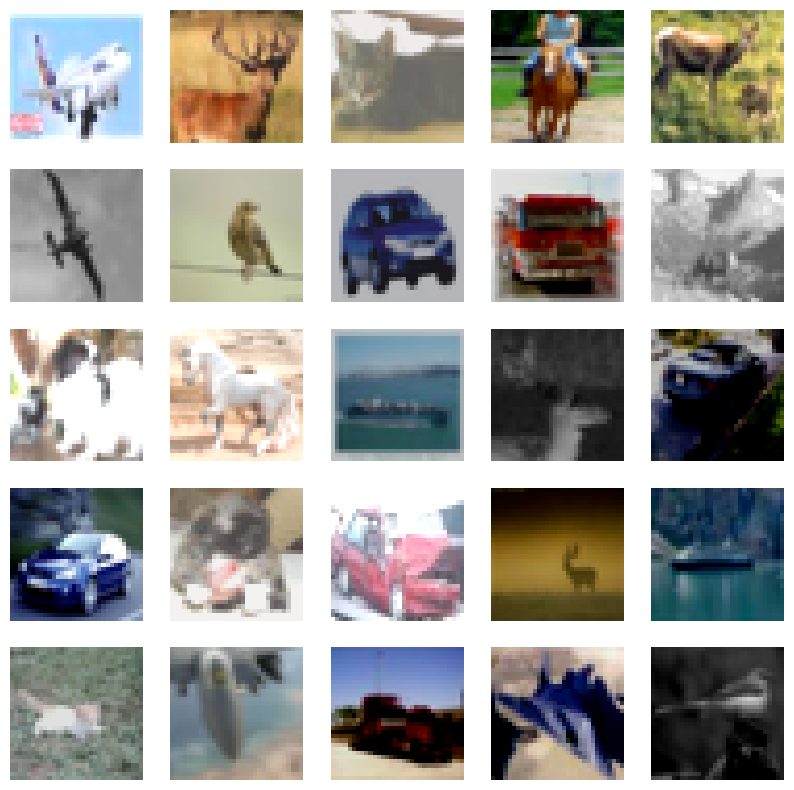

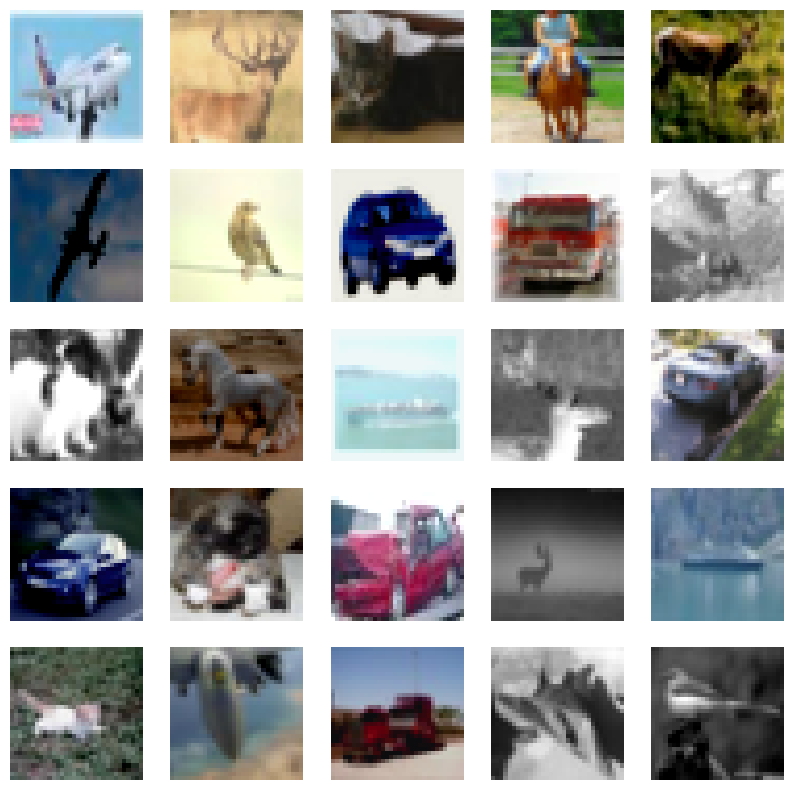

In [20]:
ssl_ds_one = tf.data.Dataset.from_tensor_slices(x_train)
ssl_ds_one = (
    ssl_ds_one.shuffle(1024, seed=SEED)
    .map(custom_augment, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

ssl_ds_two = tf.data.Dataset.from_tensor_slices(x_train)
ssl_ds_two = (
    ssl_ds_two.shuffle(1024, seed=SEED)
    .map(custom_augment, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# We then zip both of these datasets.
ssl_ds = tf.data.Dataset.zip((ssl_ds_one, ssl_ds_two))

# Visualize a few augmented images.
sample_images_one = next(iter(ssl_ds_one))
plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(sample_images_one[n].numpy().astype("int"))
    plt.axis("off")
plt.show()

# Ensure that the different versions of the dataset actually contain
# identical images.
sample_images_two = next(iter(ssl_ds_two))
plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(sample_images_two[n].numpy().astype("int"))
    plt.axis("off")
plt.show()


In [21]:
import resnet_cifar10_v2

N = 2
DEPTH = N * 9 + 2
NUM_BLOCKS = ((DEPTH - 2) // 9) - 1
inputs = layers.Input((32,32, 3))
x = layers.Rescaling(scale=1.0 / 127.5, offset=-1)(
        inputs
    )
x = resnet_cifar10_v2.stem(x)
y = resnet_cifar10_v2.learner(x, 0)
model = keras.Model(inputs=inputs, outputs=y, name="mnist_model")
model.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv2d_166 (Conv2D)            (None, 32, 32, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 batch_normalization_164 (Batch  (None, 32, 32, 16)  64          ['conv2d_166[0][0]']             
 Normalization)                                                                         

 re_lu_173 (ReLU)               (None, 8, 8, 128)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 conv2d_175 (Conv2D)            (None, 8, 8, 256)    32768       ['add_55[0][0]']                 
                                                                                                  
 conv2d_178 (Conv2D)            (None, 8, 8, 256)    32768       ['re_lu_173[0][0]']              
                                                                                                  
 add_56 (Add)                   (None, 8, 8, 256)    0           ['conv2d_175[0][0]',             
                                                                  'conv2d_178[0][0]']             
                                                                                                  
Total params: 294,320
Trainable params: 293,040
Non-trainable params: 1,280
_________________________________

In [4]:
import wget

url = "https://git.io/JYx2x"
wget.download(url)


100% [................................................................................] 6800 / 6800

'JYx2x'

In [22]:
import resnet_cifar10_v2

N = 2
DEPTH = N * 9 + 2
NUM_BLOCKS = ((DEPTH - 2) // 9) - 1


def get_encoder():
    # Input and backbone.
    
    inputs = layers.Input((CROP_TO, CROP_TO, 3))
    x = layers.Rescaling(scale=1.0 / 127.5, offset=-1)(
        inputs
    )
    x = resnet_cifar10_v2.stem(x)
    x = resnet_cifar10_v2.learner(x, 0)   #NUM_BLOCKS
    x = layers.GlobalAveragePooling2D(name="backbone_pool")(x)

    # Projection head.
    x = layers.Dense(
        PROJECT_DIM, use_bias=False, kernel_regularizer=regularizers.l2(WEIGHT_DECAY)
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dense( PROJECT_DIM, use_bias=False, kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
    outputs = layers.BatchNormalization()(x)
    return tf.keras.Model(inputs, outputs, name="encoder")


def get_predictor():
    model = tf.keras.Sequential(
        [
            # Note the AutoEncoder-like structure.
            layers.Input((PROJECT_DIM,)),
            layers.Dense(
                LATENT_DIM,
                use_bias=False,
                kernel_regularizer=regularizers.l2(WEIGHT_DECAY),
            ),
            layers.ReLU(),
            layers.BatchNormalization(),
            layers.Dense(PROJECT_DIM),
        ],
        name="predictor",
    )
    return model


In [23]:
def compute_loss(p, z):
    # The authors of SimSiam emphasize the impact of
    # the `stop_gradient` operator in the paper as it
    # has an important role in the overall optimization.
    z = tf.stop_gradient(z)
    p = tf.math.l2_normalize(p, axis=1)
    z = tf.math.l2_normalize(z, axis=1)
    # Negative cosine similarity (minimizing this is
    # equivalent to maximizing the similarity).
    return -tf.reduce_mean(tf.reduce_sum((p * z), axis=1))

In [24]:
class SimSiam(tf.keras.Model):
    def __init__(self, encoder, predictor):
        super(SimSiam, self).__init__()
        self.encoder = encoder
        self.predictor = predictor
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        # Unpack the data.
        ds_one, ds_two = data

        # Forward pass through the encoder and predictor.
        with tf.GradientTape() as tape:
            z1, z2 = self.encoder(ds_one), self.encoder(ds_two)
            p1, p2 = self.predictor(z1), self.predictor(z2)
            # Note that here we are enforcing the network to match
            # the representations of two differently augmented batches
            # of data.
            loss = compute_loss(p1, z2) / 2 + compute_loss(p2, z1) / 2

        # Compute gradients and update the parameters.
        learnable_params = (
            self.encoder.trainable_variables + self.predictor.trainable_variables
        )
        gradients = tape.gradient(loss, learnable_params)
        self.optimizer.apply_gradients(zip(gradients, learnable_params))

        # Monitor loss.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}


Epoch 1/15
391/391 [==============================] - 608s 2s/step - loss: -0.8504
Epoch 2/15
391/391 [==============================] - 652s 2s/step - loss: -0.8759
Epoch 3/15
391/391 [==============================] - 611s 2s/step - loss: -0.8892
Epoch 4/15
391/391 [==============================] - 593s 2s/step - loss: -0.9051
Epoch 5/15
391/391 [==============================] - 569s 1s/step - loss: -0.9169
Epoch 6/15
391/391 [==============================] - 645s 2s/step - loss: -0.9225
Epoch 7/15
391/391 [==============================] - 642s 2s/step - loss: -0.9252
Epoch 8/15
391/391 [==============================] - 589s 2s/step - loss: -0.9261
Epoch 9/15
391/391 [==============================] - 555s 1s/step - loss: -0.9268
Epoch 10/15
391/391 [==============================] - 550s 1s/step - loss: -0.9273
Epoch 11/15
391/391 [==============================] - 638s 2s/step - loss: -0.9282
Epoch 12/15
391/391 [==============================] - 621s 2s/step - loss: -0.9290
E

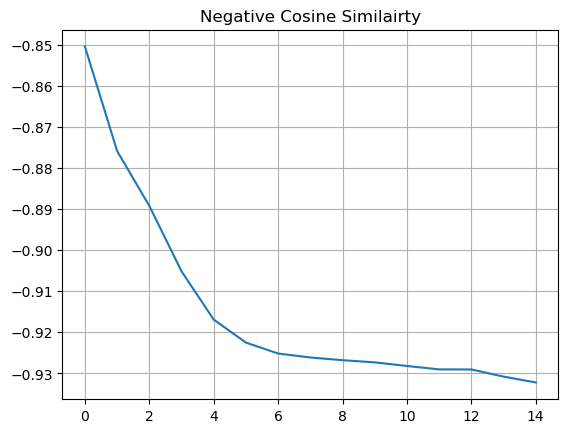

In [25]:
# Create a cosine decay learning scheduler.
num_training_samples = len(x_train)
steps = EPOCHS * (num_training_samples // BATCH_SIZE)
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.03, decay_steps=steps
)

# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss", patience=5, restore_best_weights=True
)

# Compile model and start training.
simsiam = SimSiam(get_encoder(), get_predictor())

simsiam.compile(optimizer=tf.keras.optimizers.SGD(lr_decayed_fn, momentum=0.6))
history = simsiam.fit(ssl_ds, epochs=15, callbacks=[early_stopping])

# Visualize the training progress of the model.
plt.plot(history.history["loss"])
plt.grid()
plt.title("Negative Cosine Similairty")
plt.show()

In [26]:
from glob import glob
trn1='E:/zois-data/jpg/train/*/'
trn2='E:/zois-data/jpg/test/*/'

tr1= glob(trn1)
tr2= glob(trn2)

In [15]:
len(tr2)

7

In [27]:
data = []
label = []
limit = []
l = 0

for i in tr1:
    s = 0
    y = glob(i+'/*')
    for j in range(0,len(y)):
        
        if(y[j][-4:] == 'data'):
            continue
            
        data.append(y[j])
        label.append(l)
        s = s + 1
        
    limit.append(s)
    l=l+1

    
#kk = []
l=0
s=0
te_label = []
te_data = []

for i in tr2:
    s = 0
    y = glob(i+'/*')
    for j in range(0,len(y)):
        
        if(y[j][-4:] == 'data'):
            continue
            
        te_data.append(y[j])
        te_label.append(l)
        s = s + 1
        
        if(s>limit[l]-1):
            break
    l=l+1
    #kk.append(s)
    
imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((32, 32))
    c = np.array(b)
    imgdata.append(c.reshape(32,32,3))
    
te_imgdata=[]
for i in range(len(te_data)):
    a = Image.open(te_data[i])
    b = a.resize((32, 32))
    c = np.array(b)
    te_imgdata.append(c.reshape(32,32,3))    

In [49]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),32,32,3))
# One hot vector representation of labels
Y_train = to_categorical(label)

X_train,Y_train = shuffle(X_train,Y_train)

idata = np.array(te_imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),32,32,3))
# One hot vector representation of labels
Y_test = to_categorical(te_label)

X_test,Y_test = shuffle(X_test,Y_test)

In [50]:
X_train = X_train[:400]
Y_train = Y_train[:400]
X_test = X_test[:400]
Y_test = Y_test[:400]

In [45]:
len(X_train)

400

In [51]:
# We first create labeled `Dataset` objects.
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,Y_test))

# Then we shuffle, batch, and prefetch this dataset for performance. We
# also apply random resized crops as an augmentation but only to the
# training set.
train_ds = (
    train_ds.shuffle(1024)
    .map(lambda x, y: (flip_random_crop(x), y), num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(AUTO)

# Extract the backbone ResNet20.
backbone = tf.keras.Model(
    simsiam.encoder.input, simsiam.encoder.get_layer("backbone_pool").output
)

# We then create our linear classifier and train it.
backbone.trainable = False
inputs = layers.Input((CROP_TO, CROP_TO, 3))
x = backbone(inputs, training=False)
outputs = layers.Dense(7, activation="softmax")(x)
linear_model = tf.keras.Model(inputs, outputs, name="linear_model")

# Compile model and start training.
linear_model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(lr_decayed_fn, momentum=0.9),
)
history = linear_model.fit(
    train_ds, validation_data=test_ds, epochs=50, callbacks=[early_stopping]
)
_, test_acc = linear_model.evaluate(test_ds)
print("Test accuracy: {:.2f}%".format(test_acc * 100))


Epoch 1/50
4/4 [==============================] - 4s 627ms/step - loss: 2.7507 - accuracy: 0.2175 - val_loss: 2.7366 - val_accuracy: 0.1375
Epoch 2/50
4/4 [==============================] - 1s 379ms/step - loss: 2.6946 - accuracy: 0.2175 - val_loss: 2.6635 - val_accuracy: 0.1375
Epoch 3/50
4/4 [==============================] - 1s 368ms/step - loss: 2.6211 - accuracy: 0.2150 - val_loss: 2.6111 - val_accuracy: 0.2050
Epoch 4/50
4/4 [==============================] - 1s 374ms/step - loss: 2.5676 - accuracy: 0.2250 - val_loss: 2.5815 - val_accuracy: 0.2050
Epoch 5/50
4/4 [==============================] - 1s 377ms/step - loss: 2.5351 - accuracy: 0.2250 - val_loss: 2.5696 - val_accuracy: 0.2050
Epoch 6/50
4/4 [==============================] - 1s 387ms/step - loss: 2.5213 - accuracy: 0.2250 - val_loss: 2.5708 - val_accuracy: 0.2050
Epoch 7/50
4/4 [==============================] - 1s 378ms/step - loss: 2.5141 - accuracy: 0.2200 - val_loss: 2.5778 - val_accuracy: 0.1375
Epoch 8/50
4/4 [====

In [70]:

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), input_shape=(32, 32,3)))
model.add(layers.Conv2D(16, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),))
model.add(layers.Conv2D(32, (3, 3),))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(2))
model.add(layers.Dense(7,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

In [77]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=('accuracy'))

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = .3, verbose = 1)

Epoch 1/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0851 - accuracy: 0.9724 - val_loss: 2.2235 - val_accuracy: 0.7805
Epoch 2/20
55/55 [==============================] - 2s 28ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 2.2745 - val_accuracy: 0.7764
Epoch 3/20
55/55 [==============================] - 2s 31ms/step - loss: 0.0276 - accuracy: 0.9891 - val_loss: 2.3895 - val_accuracy: 0.7791
Epoch 4/20
55/55 [==============================] - 2s 32ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 2.4860 - val_accuracy: 0.7764
Epoch 5/20
55/55 [==============================] - 2s 34ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 2.3527 - val_accuracy: 0.7845
Epoch 6/20
55/55 [==============================] - 2s 38ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 2.4600 - val_accuracy: 0.7885
Epoch 7/20
55/55 [==============================] - 2s 41ms/step - loss: 0.0121 - accuracy: 0.9977 - val_loss: 2.3889 - val_accuracy: 0.7885
Epoch 8/20
55

In [45]:
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.